# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime as dt

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)



603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Weather from above cited cities
base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'
APPID = weather_api_key
query_url = f"{base_url}appid={APPID}&units={units}&q="

#cities = ["Minneapolis", "Duluth", "Mankato"]

# Lists for output
lat = []
lon = []
found_cities = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
country = []
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        found_cities.append(city)
        print(f"Record found: {city}")
    except:
        print(f"City not found: {city}")
print(f"Finished -- Finally!")


Record found: nha trang
Record found: kapaa
Record found: sitka
City not found: meyungs
Record found: punta arenas
Record found: ponta do sol
Record found: bambous virieux
Record found: matay
Record found: ushuaia
Record found: lebu
Record found: new norfolk
Record found: esperance
Record found: bluff
Record found: mahibadhoo
Record found: sisimiut
Record found: geraldton
Record found: flinders
Record found: palanga
Record found: caltanissetta
Record found: saldanha
City not found: mys shmidta
Record found: hermanus
Record found: torbay
Record found: mataura
Record found: puerto ayora
Record found: hithadhoo
Record found: oranjemund
Record found: ilulissat
Record found: saint-avold
Record found: husavik
Record found: hobart
Record found: urengoy
Record found: bima
Record found: port alfred
City not found: takob
Record found: jamestown
Record found: limon
Record found: busselton
Record found: russkaya polyana
Record found: quatre cocos
Record found: albany
Record found: souillac
Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:

weather_df = pd.DataFrame({
    'City':found_cities, 
    'Lat':lat,
    'Lon':lon,
    'Max Temp':temp,
    'Humidity':humidity,
    'Cloudiness':cloudiness,
    'Wind Speed':wind_speed,
    'Country':country,
    'Date': dt.date.today()
    })
weather_df.to_csv("../python-api-challenge/output/cities.csv", index=True, index_label='City', header=True)

weather_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nha trang,12.2500,109.1833,84.20,81,100,3.62,VN,2022-08-12
1,kapaa,22.0752,-159.3190,73.72,91,40,11.50,US,2022-08-12
2,sitka,57.0531,-135.3300,60.69,88,40,0.00,US,2022-08-12
3,punta arenas,-53.1500,-70.9167,35.71,87,100,6.91,CL,2022-08-12
4,ponta do sol,32.6667,-17.1000,79.00,61,19,5.37,PT,2022-08-12


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
steamy = weather_df[weather_df['Humidity'] > 100]
steamy

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [6]:
weather_df.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed
count,558.000000,558.000000,558.000000,558.000000,558.00000,558.000000
mean,19.823739,16.056725,70.828495,69.136201,55.62724,8.344158
std,33.430091,89.530032,15.630738,22.645010,39.79035,6.016991
min,-54.800000,-175.200000,26.060000,7.000000,0.00000,0.000000
25%,-7.197450,-64.915350,58.895000,58.250000,12.50000,4.000000
50%,25.154000,20.436800,73.800000,75.000000,63.00000,7.090000
75%,47.235525,88.499275,81.660000,86.000000,100.00000,11.500000
max,78.218600,179.316700,111.510000,100.000000,100.00000,39.350000


In [ ]:
#  Get the indices of cities that have humidity over 100%.
# There were no cities over 100%

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.loc[weather_df['Humidity'] <= 100]
clean_city_data.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nha trang,12.2500,109.1833,84.20,81,100,3.62,VN,2022-08-12
1,kapaa,22.0752,-159.3190,73.72,91,40,11.50,US,2022-08-12
2,sitka,57.0531,-135.3300,60.69,88,40,0.00,US,2022-08-12
3,punta arenas,-53.1500,-70.9167,35.71,87,100,6.91,CL,2022-08-12
4,ponta do sol,32.6667,-17.1000,79.00,61,19,5.37,PT,2022-08-12


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

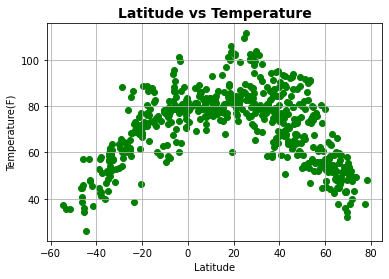

In [8]:
plt.scatter(lat, temp, marker="o", facecolors="green" )

# add labels and display as a grid
plt.title("Latitude vs Temperature", fontsize=14, weight='bold')
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Temperature(F)", fontsize=10)
plt.grid()
plt.savefig("../python-api-challenge/output/images/lat_vs_temp.png")
plt.show()

### The closer you are to the equator (0), the greater the likelihood of a higher temperature.

## Latitude vs. Humidity Plot

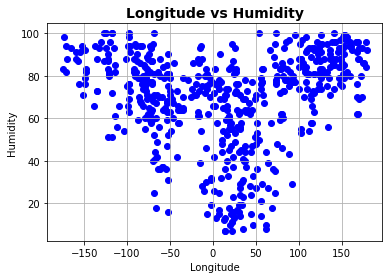

In [9]:
plt.scatter(lon, humidity, marker="o", facecolors="blue" )

# add labels and display as a grid
plt.title("Longitude vs Humidity", fontsize=14, weight='bold')
plt.xlabel("Longitude", fontsize=10)
plt.ylabel("Humidity", fontsize=10)
plt.grid()
plt.savefig("../python-api-challenge/output/images/lon_vs_humid.png")
plt.show()

### The humidity levels are often more concentrated away from 0

## Latitude vs. Cloudiness Plot

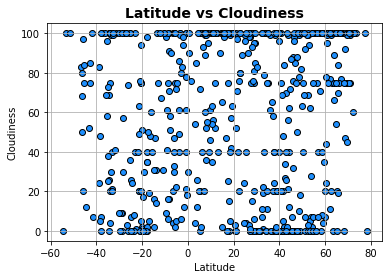

In [10]:
plt.scatter(lat, cloudiness, marker="o", facecolors="dodgerblue", edgecolor='black' )

# add labels and display as a grid
plt.title("Latitude vs Cloudiness", fontsize=14, weight='bold')
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Cloudiness", fontsize=10)
plt.grid()
plt.savefig("../python-api-challenge/output/images/lat_vs_cloud.png")
plt.show()

### The sun is always shining near the equator.

## Latitude vs. Wind Speed Plot

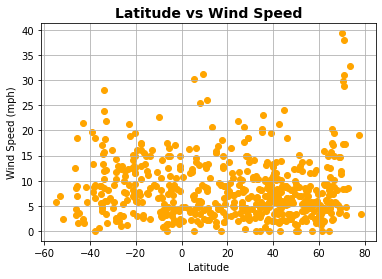

In [11]:
plt.scatter(lat, wind_speed, marker="o", facecolors="orange" )

# add labels and display as a grid
plt.title("Latitude vs Wind Speed", fontsize=14, weight='bold')
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Wind Speed (mph)", fontsize=10)
plt.grid()
plt.savefig("../python-api-challenge/output/images/lat_vs_wind.png")
plt.show()

### Wind speed is concentrated between 0 mph and 10 mph. There are some fliers farther away from the equator.

## Linear Regression

In [12]:
# Create a function to create Linear Regression plots

from sys import stderr


def linearRegression(x_values, y_values, eq_plotX, eq_plotY, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    print(f"The r-square is {rvalue}")
    print(line_eq)
    plt.annotate(line_eq, (eq_plotX, eq_plotY), fontsize=12, color="red")
    # x is latitude
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

northern_df = clean_city_data.loc[clean_city_data['Lat'] > 0]
southern_df = clean_city_data.loc[clean_city_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is -0.685795512817839
y = -0.54x + 93.91


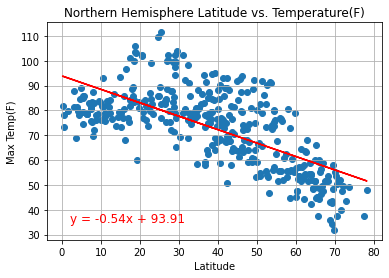

In [15]:
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']

eq_plotX = 2
eq_plotY = 35
y_label = "Max Temp(F)"
plt.title(f"Northern Hemisphere Latitude vs. Temperature(F)")
linearRegression(x_values, y_values, eq_plotX, eq_plotY, y_label)
plt.savefig("../python-api-challenge/output/images/max_temp_north.png")
plt.show()

#### It should come as no surprise that the further away from the equator you are, the lower the temperature will be.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is 0.8002632080221994
y = 0.87x + 85.02


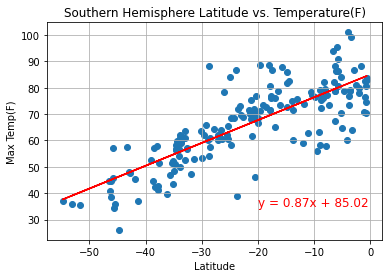

In [14]:
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']

eq_plotX = -20
eq_plotY = 35
y_label = "Max Temp(F)"
plt.title(f"Southern Hemisphere Latitude vs. Temperature(F)")
linearRegression(x_values, y_values, eq_plotX, eq_plotY, y_label)
plt.savefig("../python-api-challenge/output/images/max_temp_south.png")
plt.show()

#### Conversely, the closer you are to the equator, the warmer it is.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is 0.09118550135778411
y = 0.1x + 65.28


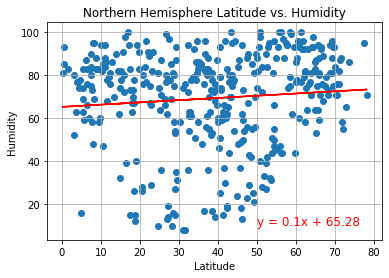

In [16]:
x_values = northern_df['Lat']
y_values = northern_df['Humidity']

eq_plotX = 50
eq_plotY = 10
y_label = "Humidity"
plt.title(f"Northern Hemisphere Latitude vs. Humidity")
linearRegression(x_values, y_values, eq_plotX, eq_plotY, y_label)
plt.savefig("../python-api-challenge/output/images/humidity_north.png")
plt.show()

#### It's sticky out there!

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is -0.1641733004974511
y = -0.28x + 62.84


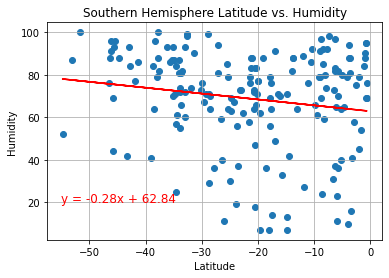

In [17]:
x_values = southern_df['Lat']
y_values = southern_df['Humidity']

eq_plotX = -55
eq_plotY = 20
y_label = "Humidity"
plt.title(f"Southern Hemisphere Latitude vs. Humidity")
linearRegression(x_values, y_values, eq_plotX, eq_plotY, y_label)
plt.savefig("../python-api-challenge/output/images/humidity_south.png")
plt.show()

#### In the southern hempisphere, it seems that the humidity is a bit more scattered than in the north.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is 0.034248456188420456
y = 0.07x + 54.81


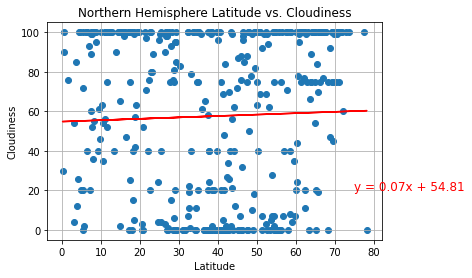

In [18]:
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']

eq_plotX = 75
eq_plotY = 20
y_label = "Cloudiness"
plt.title(f"Northern Hemisphere Latitude vs. Cloudiness")
linearRegression(x_values, y_values, eq_plotX, eq_plotY, y_label)
plt.savefig("../python-api-challenge/output/images/cloudiness_north.png")
plt.show()

#### In the north, cloud cover is at the extremes. Significant clustering at both ends of the scale.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is 0.010068736550519219
y = 0.03x + 52.05


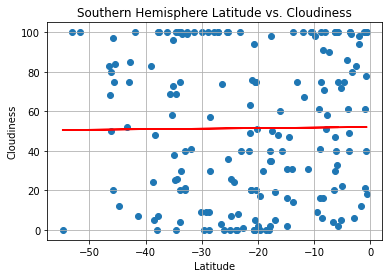

In [19]:
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']

eq_plotX = 75
eq_plotY = 20
y_label = "Cloudiness"
plt.title(f"Southern Hemisphere Latitude vs. Cloudiness")
linearRegression(x_values, y_values, eq_plotX, eq_plotY, y_label)
plt.savefig("../python-api-challenge/output/images/cloudiness_south.png")
plt.show()

#### While somewhat less clustered, the south shows similar results. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is 0.04828849024805701
y = 0.02x + 7.53


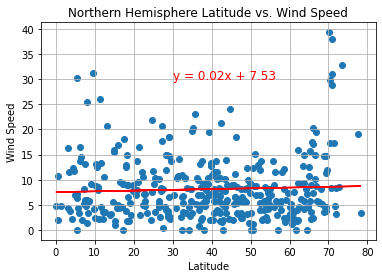

In [20]:
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']

eq_plotX = 30
eq_plotY = 30
y_label = "Wind Speed"
plt.title(f"Northern Hemisphere Latitude vs. Wind Speed")
linearRegression(x_values, y_values, eq_plotX, eq_plotY, y_label)
plt.savefig("../python-api-challenge/output/images/wind_north.png")
plt.show()

#### In the north, it's not all that windy. Heavy concentration between 0 & 10 mph.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is -0.09233178279462859
y = -0.04x + 8.02


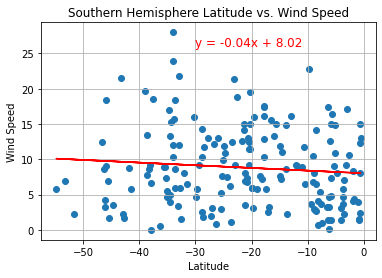

In [25]:
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']

eq_plotX = -30
eq_plotY = 26
y_label = "Wind Speed"
plt.title(f"Southern Hemisphere Latitude vs. Wind Speed")
linearRegression(x_values, y_values, eq_plotX, eq_plotY, y_label)
plt.savefig("../python-api-challenge/output/images/wind_south.png")
plt.show()

#### In the south, the wind speed is similar to the north, but the slope is negative which suggests that it's less windy near the equator.